In [29]:
import pandas as pd
import json
import numpy as np
from tqdm import tqdm
from collections import Counter, defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
file_name = "arxiv-metadata-oai-snapshot.json"
df = pd.read_json(file_name, lines=True, orient="columns")

In [31]:
df.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"


In [32]:
df.shape

(2586192, 14)

In [33]:
df.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

In [34]:
all_update_dates = df["update_date"].tolist()

In [35]:
all_years = [int(date[:4]) for date in tqdm(all_update_dates, leave=False)]

<Axes: >

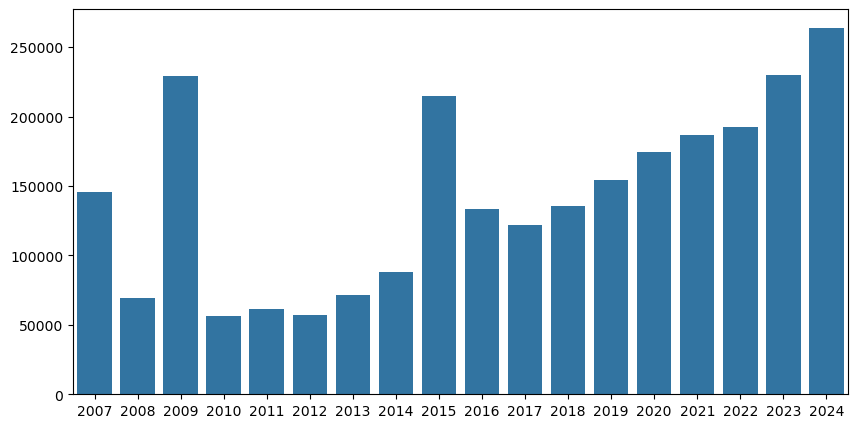

In [36]:
fig = plt.figure(figsize=(10, 5))

sns.barplot(
    x=Counter(all_years).keys(),
    y=Counter(all_years).values(),
)

# rotate the years

In [37]:
cs_cl_years = df[df["categories"].str.contains("cs.CL", na=False)][
    "update_date"
].tolist()
cs_cv_years = df[df["categories"].str.contains("cs.CV", na=False)][
    "update_date"
].tolist()

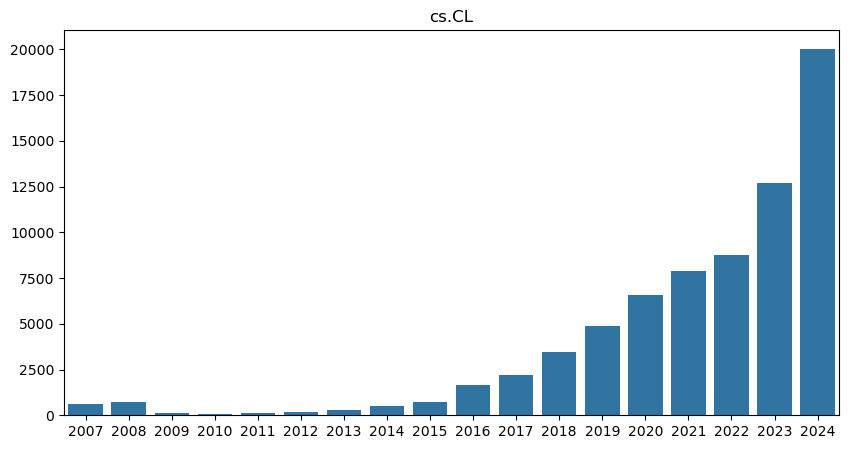

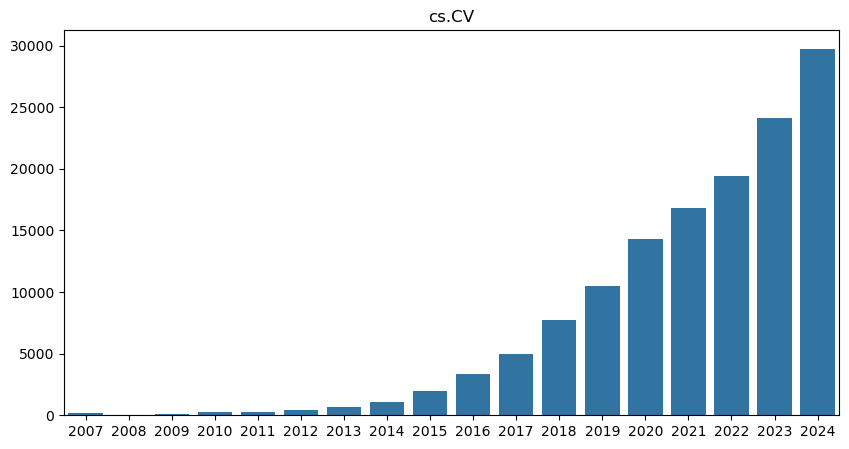

In [38]:
fig = plt.figure(figsize=(10, 5))

sns.barplot(
    x=Counter([int(date[:4]) for date in cs_cl_years]).keys(),
    y=Counter([int(date[:4]) for date in cs_cl_years]).values(),
)

plt.title("cs.CL")

fig = plt.figure(figsize=(10, 5))

sns.barplot(
    x=Counter([int(date[:4]) for date in cs_cv_years]).keys(),
    y=Counter([int(date[:4]) for date in cs_cv_years]).values(),
)

plt.title("cs.CV")

plt.show()

In [39]:
df["abstract"]

0            A fully differential calculation in perturba...
1            We describe a new algorithm, the $(k,\ell)$-...
2            The evolution of Earth-Moon system is descri...
3            We show that a determinant of Stirling cycle...
4            In this paper we show how to compute the $\L...
                                 ...                        
2586187      We report on measurements of the angular dep...
2586188      The non-linear microwave surface impedance o...
2586189      The vortex contribution to the dc field (H) ...
2586190      We show that the density of states in an ani...
2586191      The Ginzburg Landau theory for d_{x^2-y^2}-w...
Name: abstract, Length: 2586192, dtype: object

In [40]:
cl_cv_papers = df[df["categories"].isin(["cs.CL", "cs.CV"])]

In [41]:
import string

cl_cv_papers_abstracts = cl_cv_papers["abstract"].tolist()
all_clean_abstracts = []
unique_words = set()
for abstract in cl_cv_papers_abstracts:
    clean_abstract = abstract
    # remove all punctuation and put space in place of it
    clean_abstract = abstract.translate(
        str.maketrans(string.punctuation, " " * len(string.punctuation))
    )
    clean_abstract = clean_abstract.replace("\n", " ")
    clean_abstract = clean_abstract.lower()
    unique_words.update(set([word for word in clean_abstract.split()]))
    all_clean_abstracts.append(clean_abstract)

print(
    "The number of unique words in the abstracts of papers in cs.CL and cs.CV is: ",
    len(unique_words),
)
cl_cv_papers["clean_abstract"] = all_clean_abstracts
list(unique_words)[:50]

The number of unique words in the abstracts of papers in cs.CL and cs.CV is:  111289


/tmp/ipykernel_258320/3085068822.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_cv_papers["clean_abstract"] = all_clean_abstracts


['pronunciation',
 'rotatedfilters',
 'overestimate',
 'amrcoc',
 'antifakeprompt',
 '893',
 'ovps',
 'hats',
 'koala',
 'autogcn',
 'diffclip',
 'infinitely',
 'human2bot',
 '3c3',
 'efficientnetv2',
 'apb2facev2',
 'identifying',
 'wheeled',
 'ohttps',
 'td',
 'are',
 'storied',
 'barrels',
 'pix2vox',
 'dx',
 'kocurvik',
 'rs2dpca',
 '591',
 'maximizes',
 'calligraphy',
 'selar',
 'copes',
 'vegad',
 'stratum',
 'transcrowd',
 'sdrt',
 'reconsidering',
 'subtraction',
 'denseres',
 'onco',
 'fowa',
 'detr4d',
 'multiple',
 'pve',
 'msffn',
 'wreaking',
 'lfpw',
 'ghclnet',
 'chatvideo',
 'wildpass']

In [42]:
cl_cv_papers

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,clean_abstract
1266,0704.1267,Laurence Likforman,"Laurence Likforman-Sulem, Abderrazak Zahour, B...",Text Line Segmentation of Historical Documents...,"25 pages, submitted version, To appear in Inte...","Vol. 9, no 2-4, April 2007, pp. 123-138",10.1007/s10032-006-0023-z,None,cs.CV,None,There is a huge amount of historical documen...,"[{'version': 'v1', 'created': 'Tue, 10 Apr 200...",2007-05-23,"[[Likforman-Sulem, Laurence, ], [Zahour, Abder...",there is a huge amount of historical documen...
3707,0704.3708,Bernat Corominas-Murtra BCM,Bernat Corominas-Murtra,Network statistics on early English Syntax: St...,"New abstract. Due to a mistake, abstract from ...",None,None,None,cs.CL,None,This paper includes a reflection on the role...,"[{'version': 'v1', 'created': 'Fri, 27 Apr 200...",2007-05-23,"[[Corominas-Murtra, Bernat, ]]",this paper includes a reflection on the role...
4216,0705.0214,Mourad Zerai,"Mourad Zerai, Maher Moakher",Riemannian level-set methods for tensor-valued...,"11 pages, 03 figures, to be published in the p...",None,None,None,cs.CV,None,We present a novel approach for the derivati...,"[{'version': 'v1', 'created': 'Wed, 2 May 2007...",2007-05-23,"[[Zerai, Mourad, ], [Moakher, Maher, ]]",we present a novel approach for the derivati...
4451,0705.0449,Pierre-Francois Marteau,"Pierre-Fran\c{c}ois Marteau (VALORIA), Gilbas ...",Multiresolution Approximation of Polygonal Cur...,None,None,None,None,cs.CV,None,We propose a new algorithm to the problem of...,"[{'version': 'v1', 'created': 'Thu, 3 May 2007...",2007-05-23,"[[Marteau, Pierre-François, , VALORIA], [Ménie...",we propose a new algorithm to the problem of...
4783,0705.0781,Tshilidzi Marwala,Jonathan M.Spiller and T. Marwala,Medical Image Segmentation and Localization us...,4 pages,None,None,None,cs.CV,None,This paper presents deformable templates as ...,"[{'version': 'v1', 'created': 'Sun, 6 May 2007...",2007-05-23,"[[Spiller, Jonathan M., ], [Marwala, T., ]]",this paper presents deformable templates as ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339384,cs/9912005,Masaki Murata,"M. Murata (CRL), M. Nagao (Kyoto University)",An Estimate of Referent of Noun Phrases in Jap...,"5 pages, 0 figures. Computation and Language","Coling-ACL '98, Montrial, Canada, August 10, 1...",None,None,cs.CL,None,In machine translation and man-machine dialo...,"[{'version': 'v1', 'created': 'Mon, 13 Dec 199...",2007-05-23,"[[Murata, M., , CRL], [Nagao, M., , Kyoto Univ...",in machine translation and man machine dialo...
2339385,cs/9912006,Masaki Murata,"M. Murata, M. Nagao (Kyoto University)",Resolution of Verb Ellipsis in Japanese Senten...,"6 pages, 0 figures. Computation and Language",Natural Language Processing Pacific Rim Sympos...,None,None,cs.CL,None,Verbs are sometimes omitted in Japanese sent...,"[{'version': 'v1', 'created': 'Mon, 13 Dec 199...",2009-09-25,"[[Murata, M., , Kyoto University], [Nagao, M.,...",verbs are sometimes omitted in japanese sent...
2339386,cs/9912007,Masaki Murata,"M. Murata, Q. Ma, K. Uchimoto, H. Isahara (CRL)",An Example-Based Approach to Japanese-to-Engli...,"11 pages, 0 figures. Computation and Language","TMI'99, Chester, UK, August 23, 1999",None,None,cs.CL,None,We have developed a new method for Japanese-...,"[{'version': 'v1', 'created': 'Mon, 13 Dec 199...",2007-05-23,"[[Murata, M., , CRL], [Ma, Q., , CRL], [Uchimo...",we have developed a new method for japanese ...
2339388,cs/9912009,Schwitter,Michael Hess,Deduction over Mixed-Level Logic Representatio...,"8 pages, Proceedings of the Eighth Internation...","IEEE Computer Society Press, 1996. 383-390",10.1109/TAI.1996.560480,None,cs.CL,None,A system is described that uses a mixed-leve...,"[{'version': 'v1', 'created': 'Wed, 15 Dec 199...",2016-11-15,"[[Hess, Michael, ]]",a system is described that uses a mixed leve...


In [53]:
def get_liwc_dictionary():
    LIWC_CATEGORIES_DICT = {}
    with open("liwc_dictionary.dic") as f:
        lines = f.readlines()
    num_of_percent_signs = 0
    liwc_dict = defaultdict(list)

    for index, line in enumerate(lines):
        if line.strip() == "%":
            num_of_percent_signs += 1
            continue
        elif num_of_percent_signs == 1:
            category_index, category_name = line.split("\t")
            LIWC_CATEGORIES_DICT[int(category_index)] = category_name.strip()
            continue

        word_plus_categories = line.split("\t")
        word = word_plus_categories[0]
        categories = word_plus_categories[1:]
        for category in categories:
            liwc_dict[LIWC_CATEGORIES_DICT[int(category)]].append(word.lower())
    return liwc_dict, LIWC_CATEGORIES_DICT


liwc_dict, LIWC_CATEGORIES_DICT = get_liwc_dictionary()

In [65]:
def add_liwc_features(input_df, input_text_column, liwc_dict, LIWC_CATEGORIES_DICT):
    output_df = input_df.copy()

    liwc_features_dict = defaultdict(list)
    for _, row in tqdm(output_df.iterrows(), leave=False, total=len(output_df)):
        try:
            text = row[input_text_column]
            text = f" {text} "
            text_length = len(text.split())
            for category in LIWC_CATEGORIES_DICT.values():
                count = 0
                for word in liwc_dict[category]:
                    if word.endswith("*"):
                        count += text.count(f" {word[:-1]}")
                    else:
                        count += text.count(f" {word} ")
                liwc_features_dict[category].append(count / text_length)
        except Exception as e:
            print(e)
            for category in LIWC_CATEGORIES_DICT.values():
                liwc_features_dict[category].append(np.nan)

    for category in LIWC_CATEGORIES_DICT.values():
        output_df[category] = liwc_features_dict[category]

    return output_df

In [68]:
random_text = "abandonment abusive i am happy dollar"
temp_df = add_liwc_features(
    pd.DataFrame({"clean_abstract": [random_text]}),
    "clean_abstract",
    liwc_dict,
    LIWC_CATEGORIES_DICT,
)

In [69]:
print("Length of the text: ", len(random_text.split()))

for category in LIWC_CATEGORIES_DICT.values():
    print(f"{category}: {temp_df[category].values[0] * len(random_text.split())}")

Length of the text:  6
funct: 2.0
pronoun: 1.0
ppron: 1.0
i: 1.0
we: 0.0
you: 0.0
shehe: 0.0
they: 0.0
ipron: 0.0
article: 0.0
verb: 1.0
auxverb: 1.0
past: 0.0
present: 1.0
future: 0.0
adverb: 0.0
preps: 0.0
conj: 0.0
negate: 0.0
quant: 0.0
number: 0.0
swear: 0.0
social: 0.0
family: 0.0
friend: 0.0
humans: 0.0
affect: 3.0
posemo: 1.0
negemo: 2.0
anx: 0.0
anger: 1.0
sad: 1.0
cogmech: 1.0
insight: 0.0
cause: 0.0
discrep: 0.0
tentat: 0.0
certain: 0.0
inhib: 1.0
incl: 0.0
excl: 0.0
percept: 0.0
see: 0.0
hear: 0.0
feel: 0.0
bio: 0.0
body: 0.0
health: 0.0
sexual: 0.0
ingest: 0.0
relativ: 0.0
motion: 0.0
space: 0.0
time: 0.0
work: 0.0
achieve: 0.0
leisure: 0.0
home: 0.0
money: 1.0
relig: 0.0
death: 0.0
assent: 0.0
nonfl: 0.0
filler: 0.0


In [ ]:
cl_cv_papers = add_liwc_features(
    cl_cv_papers, "clean_abstract", liwc_dict, LIWC_CATEGORIES_DICT
)

In [83]:
# plot the fraction of the coverage of all the unique words in the abstracts of papers in cs.CL and cs.CV, in each month of the each year

word_counts_in_month_year = defaultdict(Counter)
num_papers_in_month_year = defaultdict(int)
for _, row in tqdm(cl_cv_papers.iterrows(), leave=False, total=len(cl_cv_papers)):
    year = int(row["update_date"][:4])
    month = int(row["update_date"][5:7])
    word_counts_in_month_year[(year, month)].update(
        [word.lower() for word in row["abstract"].split()]
    )
    num_papers_in_month_year[(year, month)] += 1

In [84]:
# normalize the counts by the total number of papers in each month of each year
word_counts_in_month_year_normalized = defaultdict(Counter)
for (year, month), counter in word_counts_in_month_year.items():
    for word, count in counter.items():
        word_counts_in_month_year_normalized[(year, month)][word] = (
            count / num_papers_in_month_year[(year, month)]
        )

In [160]:
def check_for_big_spikes_after_time(word_of_interest):
    word_of_interest_counts = []

    sorted_months_years = sorted(
        word_counts_in_month_year.keys(), key=lambda x: (x[0], x[1])
    )

    sorted_months_years = [(x, y) for x, y in sorted_months_years if int(x) > 2020]

    for year, month in sorted_months_years:
        counter = word_counts_in_month_year_normalized[(year, month)]
        word_of_interest_counts.append(counter[word_of_interest])

    index_for_nov_2022 = sorted_months_years.index((2022, 11))

    spike_before = np.mean(word_of_interest_counts[:index_for_nov_2022])
    spike_after = np.mean(word_of_interest_counts[index_for_nov_2022:])

    return (
        spike_after,
        spike_before,
        len(
            [
                num
                for num in word_of_interest_counts[index_for_nov_2022:]
                if num > spike_before
            ]
        )
        / len(word_of_interest_counts[index_for_nov_2022:]),
    )

In [161]:
def plot_the_usage_of_word(words_of_interest):

    # plot the number of usage of word of interest in the abstracts of papers in cs.CL and cs.CV, in each month of the each year
    fig = plt.figure(figsize=(20, 5))

    for word in words_of_interest:
        word_of_interest_counts = []

        # sorted month and years
        sorted_months_years = sorted(
            word_counts_in_month_year.keys(), key=lambda x: (x[0], x[1])
        )

        sorted_months_years = [(x, y) for x, y in sorted_months_years if int(x) > 2020]

        for year, month in sorted_months_years:
            counter = word_counts_in_month_year_normalized[(year, month)]
            word_of_interest_counts.append(counter[word])

        sns.lineplot(
            x=range(len(word_of_interest_counts)), y=word_of_interest_counts, label=word
        )

    # also create a vertical line on 11 (November) 2022
    index_for_nov_2022 = sorted_months_years.index((2022, 11))
    plt.axvline(x=index_for_nov_2022, color="r", linestyle="--")

    plt.xticks(
        range(len(word_of_interest_counts)),
        [f"{year}-{month}" for year, month in sorted_months_years],
        rotation=90,
    )
    plt.legend()

    plt.show()

Is the usage of word pivotal increased by more than 5 times after November 2022? True and True
Is the usage of word transformers increased by more than 5 times after November 2022? False and False
Is the usage of word realm increased by more than 5 times after November 2022? True and True
Is the usage of word groundbreaking increased by more than 5 times after November 2022? False and False
Is the usage of word showcasing increased by more than 5 times after November 2022? True and True


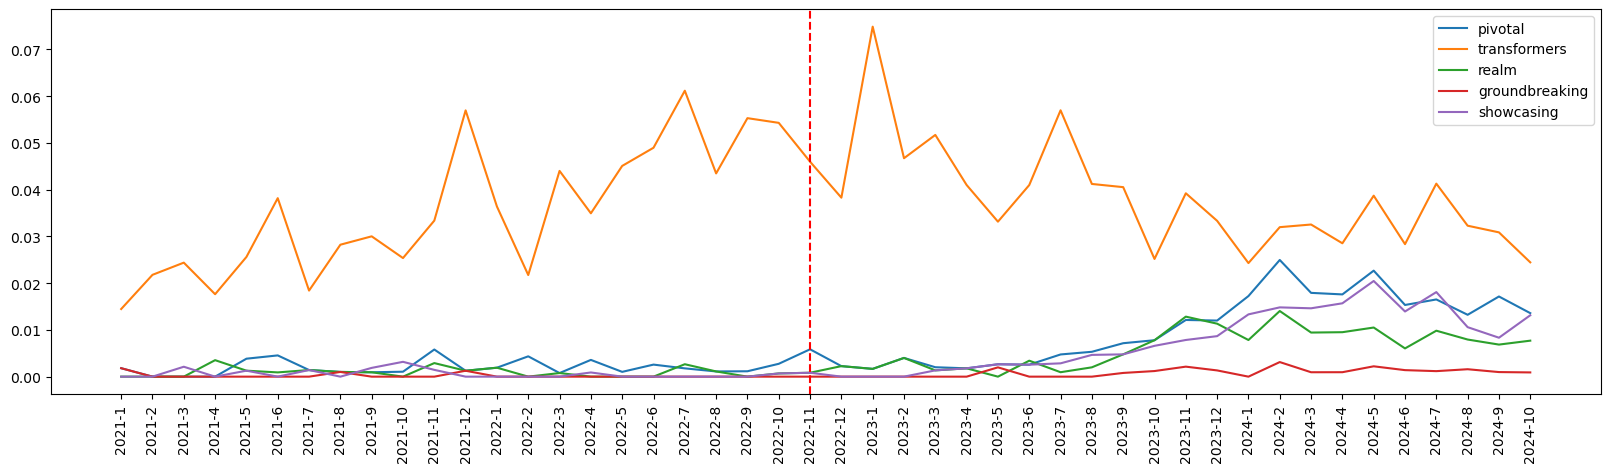

In [166]:
words_set = ["pivotal", "transformers", "realm", "groundbreaking", "showcasing"]
threshold = 5
for word in words_set:
    x, y, z = check_for_big_spikes_after_time(word)
    print(
        f"Is the usage of word {word} increased by more than {threshold} times after November 2022? {x > threshold * y} and {z > 0.8}"
    )

plot_the_usage_of_word(words_set)

In [167]:
words_with_big_spikes = []

for word in tqdm(unique_words, leave=False):
    x, y, z = check_for_big_spikes_after_time(word)
    if x > threshold * y and z > 0.8:
        words_with_big_spikes.append(word)

print(
    "Number of words with big spikes after the introduction of GPT-3 in November 2022: ",
    len(words_with_big_spikes),
)

Number of words with big spikes after the introduction of GPT-3 in November 2022:  54


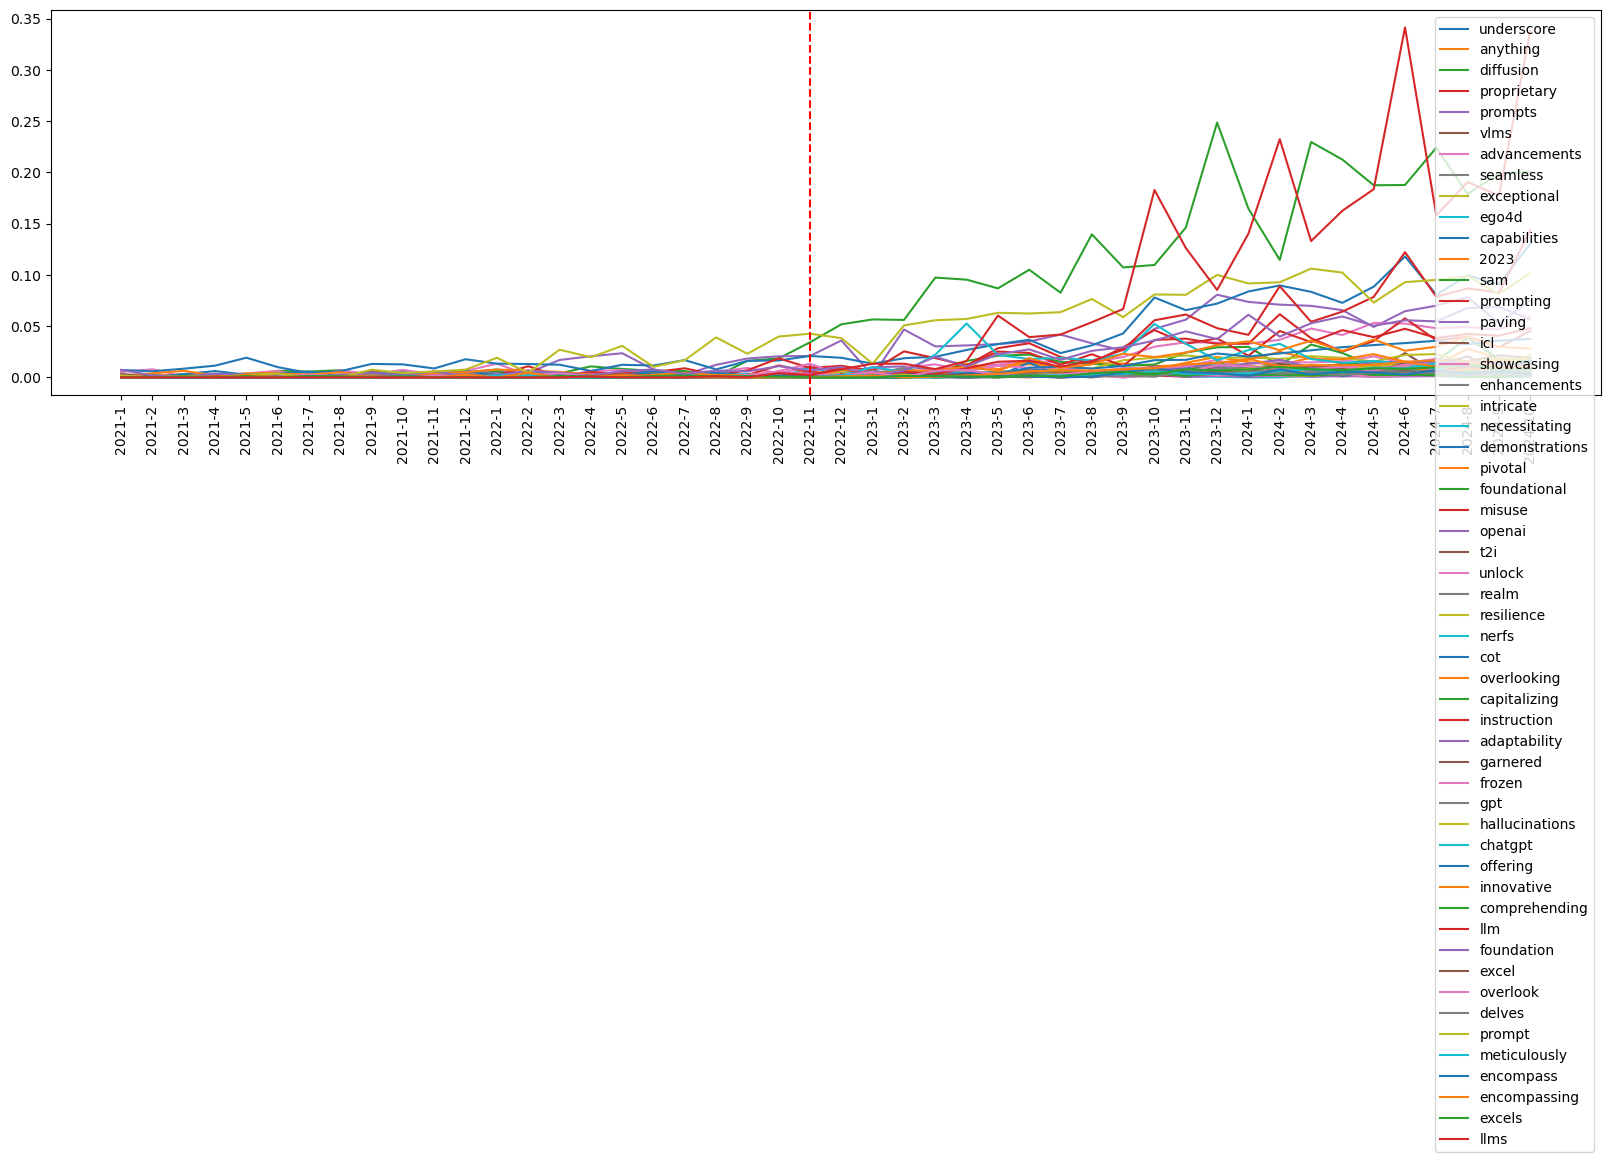

In [168]:
plot_the_usage_of_word(words_with_big_spikes)

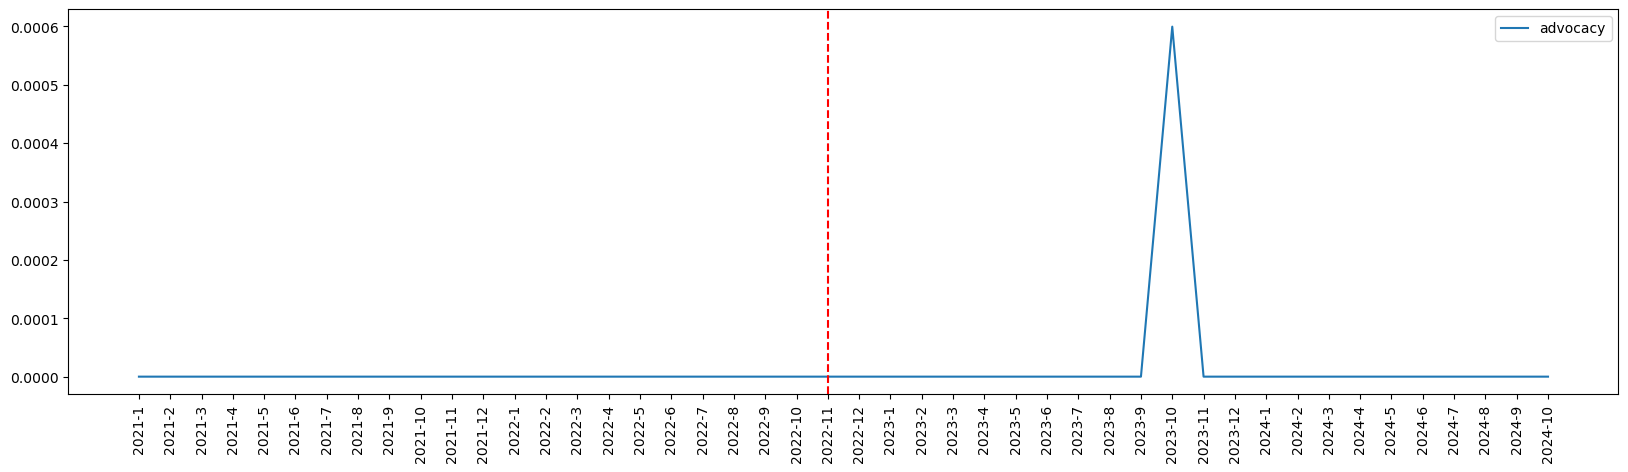

In [155]:
plot_the_usage_of_word(["advocacy"])